# Primary Component Analysis (PCA)

Using Scikit Learn, apply PCA to reduce the dimension of MNIST (28x28) 

## PCA Pre-requisite

The dataset is centered around the origin. To do it manually by yourself with numpy (Scikit Learn PCA looks after centering the data, hence not required).

```
X_centered = X - X.mean(axis=0)
```

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import scipy as sp
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST

In [30]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# Split data into training and test
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Mathematics

## Diagonalization
It is able to find the onthogonal bases, in the space of which the co-variances of the data becomes 0.

<img align="left" src="./images/pca/basis.diagonalization.png" width="1000">

## Primary Components

In that space, the variance along each basis is the contribution to the information that the data posseses. The basis along which the data has the maximum variance is the 1st primary component of the data. The basis that has 2nd maximum variance is the 2nd primary compoent, and so on. 

<img align="left" src="./images/pca/basis.variance_is_contribution.png" width="1000"> 

## Eigenvectors

Those onthogonal bases are the eigenvectors and the eigenvalues are the variances. 

<img align="left" src="./images/pca/basis.variance_to_primary_component.png" width="1000"> 


## Eigenvalues
Hence Primary Comonents can be identified from the eigenvalues.

In [37]:
np.set_printoptions(
    suppress=True #, formatter={'float_kind':'{:0.5f}'.format}
)

from sklearn.preprocessing import StandardScaler
X_centered = StandardScaler().fit_transform(X_train - X_train.mean(axis=0))

covariance_matrx = X_centered.T.dot(X_centered) 
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrx)

eigenvalues_ratios = np.sort(eigenvalues / np.sum(eigenvalues))[::-1]
eigenvalues_coverages = np.cumsum(eigenvalues_ratios)

<function matplotlib.pyplot.show(*args, **kw)>

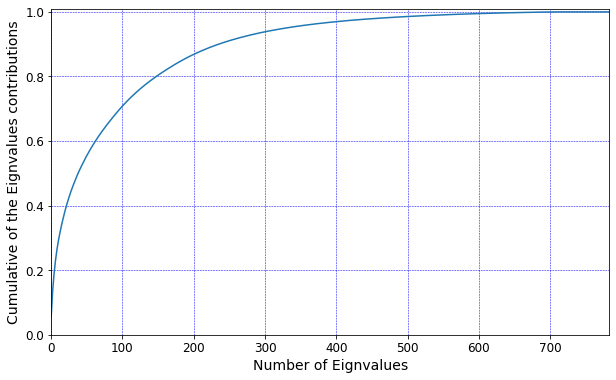

In [38]:
dimensions = range(0, len(eigenvalues_ratios))

plt.figure(figsize=(10, 6))

# --------------------------------------------------------------------------------
# Axes
# [Axis limits]
# With plt.axes() you are creating a new axes again. 
# Use ax.set_xlim(a,b) and ax.set_ylim(a,b)
# --------------------------------------------------------------------------------
#plt.axis((0,max(dimensions),0,1.01))
# --------------------------------------------------------------------------------
ax = plt.gca()
ax.set_xlim(0, max(dimensions))
ax.set_ylim(0, 1.01)
ax.set_xlabel("Number of Eignvalues")
ax.set_ylabel("Cumulative of the Eignvalues contributions")

# --------------------------------------------------------------------------------
# Grid
# --------------------------------------------------------------------------------
import math
import matplotlib.ticker as ticker

plt.grid(
    color='b',
    linestyle='--',
    linewidth=0.5,
    which='both'     # Both major and minor grids
)

# --------------------------------------------------------------------------------
# Information coverage along Primary Components 
# --------------------------------------------------------------------------------
plt.plot(dimensions, eigenvalues_coverages)
plt.show

## Map (Rorate & Extend)
<img align="left" src="./images/pca/basis.rotate_to_map.png" width="400"> 

## Transpose
<img align="left" src="./images/pca/VT.Semantic.png" width="1000"> 

<hr/>

# PCA

The idea of PCA (Primary Component Analysis) is to identify the top <b>k</b> primary components and ignore the rest of the components, by which the dimentionality can be reduced from n to k.

<img align="left" src="./images/pca/pca.idea.png" width="400">
<br/>

## Choosing k

Find <b>k</b> which preseves 99% (or 95%) of the variance of the data. <br/>

<cite><b> Andrew Ng</b></cite>
<pre>
<img align="left" src="./images/pca/andrew_ng_choosing_k.png" width="750">
</pre>

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
contributions = pca.explained_variance_ratio_
coverages = pca.explained_variance_ratio_.cumsum()
k = np.argmax(coverages >= 0.95)

print("Top 3 primary component contributions: {}".
      format(np.round(contributions[:5], decimals=5))
)
print("Coverage by the top 3 primary components: {}".
      format(np.round(coverages[:5], decimals=5))
)
print("k-th primary compoent for 95% coverage is {}".
      format(k + 1)
)

Top 3 primary component contributions: [0.09705 0.07096 0.06169 0.05389 0.04869]
Coverage by the top 3 primary components: [0.09705 0.16801 0.2297  0.28359 0.33228]
k-th primary compoent for 95% coverage is 154


<function matplotlib.pyplot.show(*args, **kw)>

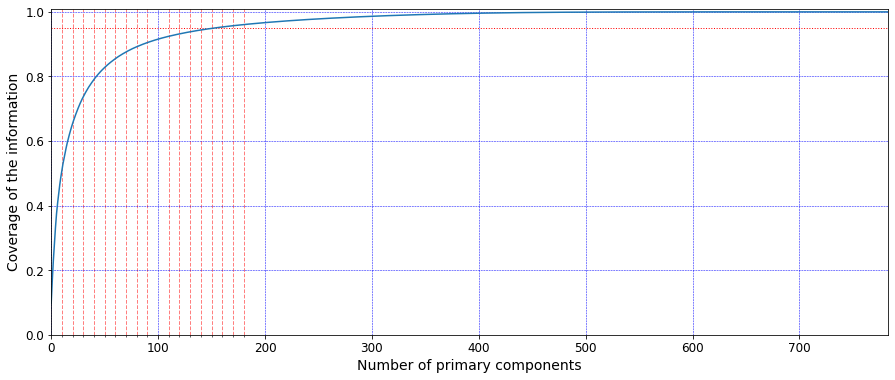

In [35]:
dimensions = range(0, len(contributions))

plt.figure(figsize=(15, 6))

# --------------------------------------------------------------------------------
# Axes
# [Axis limits]
# With plt.axes() you are creating a new axes again. 
# Use ax.set_xlim(a,b) and ax.set_ylim(a,b)
# --------------------------------------------------------------------------------
#plt.axis((0,max(dimensions),0,1.01))
# --------------------------------------------------------------------------------
ax = plt.gca()
ax.set_xlim(0, max(dimensions))
ax.set_ylim(0, 1.01)
ax.set_xlabel("Number of primary components")
ax.set_ylabel("Coverage of the information")

# --------------------------------------------------------------------------------
# Grid
# --------------------------------------------------------------------------------
import math
import matplotlib.ticker as ticker

plt.grid(
    color='b',
    linestyle='--',
    linewidth=0.5,
    which='both'     # Both major and minor grids
)

# Minor grid
minors = range(0, math.ceil(k/100)*100, 10)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.grid(
    which='minor', # Set the minor grid attributes
    alpha=0.5,     # Transparency
    lw=1, 
    color='r'
)

# 95% coverage line
plt.plot([0.0, max(dimensions)], [0.95, 0.95], "r:", lw=1)

# --------------------------------------------------------------------------------
# Information coverage along Primary Components 
# --------------------------------------------------------------------------------
plt.plot(dimensions, coverages)
plt.show

# SVD

[We Recommend a Singular Value Decomposition](http://www.ams.org/publicoutreach/feature-column/fcarc-svd)<br>

<img align="left" src="./images/pca/onthgonal_to_onthogonal.png" width="800">

With those (u, v), any matrix M, including a Covariance Matrix, can be decomposed as below.
<br/>
<img align="left" src="./images/pca/SVD.png" width="1000">

## Relation between SVD and PCA

The eignvectors <b>E</b> of PCA is the same with the singular vector <b>V</b> of SVD. <br/>
<img align="left" src="./images/pca/PCA_SVD_Relation.png" width="500">
<img align="left" src="./images/pca/SVD2PCA.png" width="1000">
<img align="left" src="./images/pca/SVD_PCA.png" width="1000">

## SVD

In [45]:
from sklearn.preprocessing import StandardScaler
X_centered = StandardScaler().fit_transform(X_train - X_train.mean(axis=0))
covariance_matrx = X_centered.T.dot(X_centered) 
# --------------------------------------------------------------------------------
# Use scipy to avoid numpy MemoryError: Unable to allocate array with shape
# https://stackoverflow.com/questions/19743525/
# https://github.com/numpy/numpy/issues/4268
# http://fa.bianp.net/blog/2012/singular-value-decomposition-in-scipy/
# --------------------------------------------------------------------------------
#U, s, Vt = np.linalg.svd(X_centered)
U, s, Vt= sp.linalg.svd(covariance_matrx)
# --------------------------------------------------------------------------------

In [47]:
total = np.sum(s ** 2)
k = 0
coverage = 0

while coverage <= COVERAGE:
    coverage += ((s[k] ** 2) / total)
    k += 1
    
print("k-th component to cover {0} is {1}".format(coverage, k))

k-th component to cover 0.9507022719172283 is 67


In [ ]:
[0.09705 0.07096 0.06169 0.05389 0.04869]